# Build a Financial Insights Dashboard and Scoring Model 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_excel(r"C:\Users\7mala\Downloads\family_financial_and_transactions_data.xlsx")
data.head(10)

Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   
5    FAM001  FAM001_Member1       2024-10-09   Utilities  100.19  113810   
6    FAM001  FAM001_Member1       2024-10-06  Healthcare  116.73  113810   
7    FAM001  FAM001_Member1       2024-10-23   Groceries  440.79  113810   
8    FAM001  FAM001_Member1       2024-10-26  Healthcare  233.17  113810   
9    FAM001  FAM001_Member1       2024-10-23      Travel  267.29  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   
5    20234              5781           2422                  2959           2   
6    20234              5781           2422                  2959           2   
7    20234              5781           2422                  2959           2   
8    20234              5781           2422                  2959           2   
9    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68  
2                       68  
3                       68  
4                       68  
5                       68  
6                       68  
7                       68  
8                       68  
9                       68

In [3]:
#Data type of the Columns
data.dtypes

Family ID                          object
Member ID                          object
Transaction Date           datetime64[ns]
Category                           object
Amount                            float64
Income                              int64
Savings                             int64
Monthly Expenses                    int64
Loan Payments                       int64
Credit Card Spending                int64
Dependents                          int64
Financial Goals Met (%)             int64
dtype: object

In [4]:
#Shape of the columns
print(data.shape)

(16306, 12)


In [5]:
#Summary Statistics: Get a quick overview of your data.
data.describe()


Transaction Date        Amount         Income  \
count                          16306  16306.000000   16306.000000   
mean   2024-10-16 00:34:31.777259776    256.368534   90340.503925   
min              2024-10-01 00:00:00     10.030000   30851.000000   
25%              2024-10-08 00:00:00    134.820000   59871.000000   
50%              2024-10-16 00:00:00    256.055000   90142.000000   
75%              2024-10-24 00:00:00    379.240000  119733.000000   
max              2024-10-31 00:00:00    499.910000  149871.000000   
std                              NaN    141.153813   34740.834136   

            Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
count  16306.000000      16306.000000   16306.000000          16306.000000   
mean   24473.998038       3948.522384    2529.978965           1782.880535   
min     1037.000000       1013.000000       3.000000            510.000000   
25%    11016.000000       2582.000000    1390.000000           1221.000000   
50%    25504.000000       3721.000000    2548.000000           1705.000000   
75%    37422.000000       5450.000000    3724.000000           2422.000000   
max    49217.000000       6968.000000    4974.000000           2999.000000   
std    14828.955695       1689.987801    1384.105561            716.595101   

         Dependents  Financial Goals Met (%)  
count  16306.000000             16306.000000  
mean       3.201521                59.418006  
min        0.000000                21.000000  
25%        2.000000                37.000000  
50%        3.000000                58.000000  
75%        4.000000                79.000000  
max        5.000000               100.000000  
std        1.468880                23.444304

In [6]:
# Missing values
data.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

* No Missing values

In [7]:
#1. Data Analysis
#Identify Spending Patterns
#To identify family-level and member-level spending patterns
# Family-level spending patterns
family_spending = data.groupby('Family ID')['Amount'].sum()
family_spending




Family ID
FAM001    23188.90
FAM002    22309.71
FAM003    11220.34
FAM004    23483.10
FAM005    40246.21
            ...   
FAM196    31433.34
FAM197     4032.82
FAM198    19378.59
FAM199    31009.65
FAM200    24887.93
Name: Amount, Length: 200, dtype: float64

In [8]:
# Member-level spending patterns
member_spending = data.groupby('Member ID')['Amount'].sum()
member_spending

Member ID
FAM001_Member1    6521.20
FAM001_Member2    7084.83
FAM001_Member3    2119.41
FAM001_Member4    7463.46
FAM002_Member1    3082.90
                   ...   
FAM200_Member2    2103.85
FAM200_Member3    4671.33
FAM200_Member4    3739.52
FAM200_Member5    5408.28
FAM200_Member6    1837.73
Name: Amount, Length: 926, dtype: float64

In [9]:
#Correlations Between Financial Metrics
# Correlation matrix
correlation_matrix = data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].corr()
correlation_matrix


Income   Savings  Monthly Expenses  Loan Payments  \
Income                1.000000 -0.108340         -0.041355      -0.073053   
Savings              -0.108340  1.000000         -0.082094      -0.125158   
Monthly Expenses     -0.041355 -0.082094          1.000000      -0.052883   
Loan Payments        -0.073053 -0.125158         -0.052883       1.000000   
Credit Card Spending -0.123225  0.022499         -0.046059       0.025535   

                      Credit Card Spending  
Income                           -0.123225  
Savings                           0.022499  
Monthly Expenses                 -0.046059  
Loan Payments                     0.025535  
Credit Card Spending              1.000000

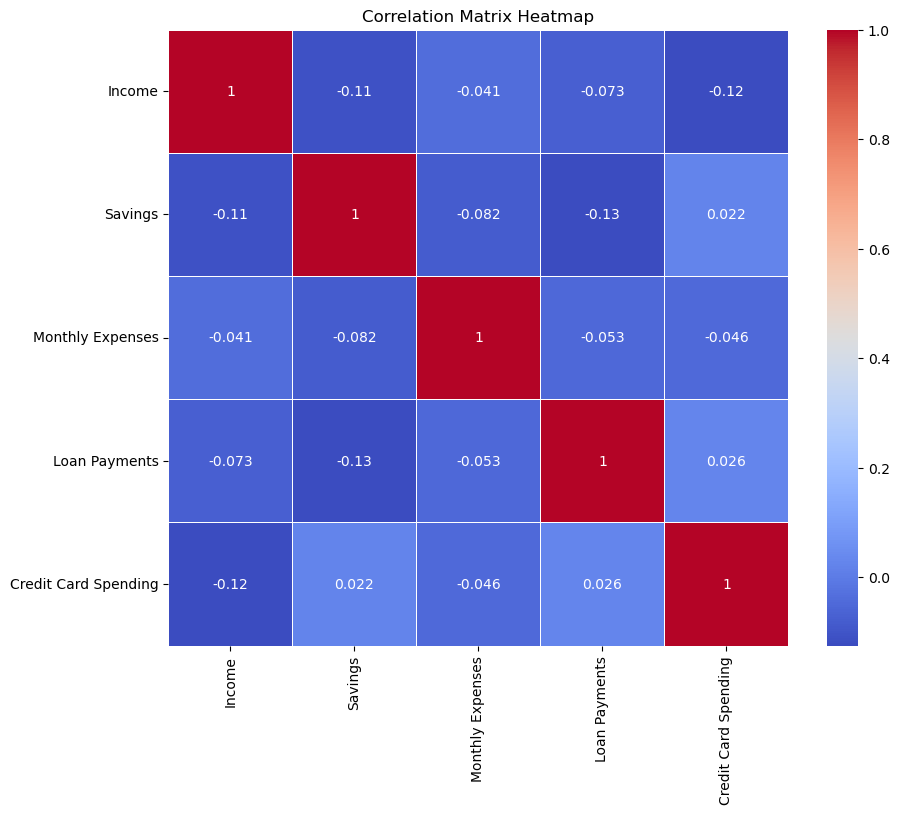

In [10]:
# Calculate the correlation matrix
correlation_matrix = data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
#Build a Financial Scoring Model
def calculate_financial_score(row):
    savings_to_income_ratio = row['Savings'] / row['Income']
    expenses_to_income_ratio = row['Monthly Expenses'] / row['Income']
    loan_to_income_ratio = row['Loan Payments'] / row['Income']
    credit_card_trend = row['Credit Card Spending'] / row['Income']
    financial_goals_met = row['Financial Goals Met (%)'] / 100

    # Example weights
    score = (savings_to_income_ratio * 0.3 +
             (1 - expenses_to_income_ratio) * 0.2 +
             (1 - loan_to_income_ratio) * 0.2 +
             (1 - credit_card_trend) * 0.1 +
             financial_goals_met * 0.2) * 100
    return score

data['Financial Score'] = data.apply(calculate_financial_score, axis=1)


In [12]:
data

Family ID       Member ID Transaction Date       Category  Amount  \
0        FAM001  FAM001_Member1       2024-10-07         Travel  409.12   
1        FAM001  FAM001_Member1       2024-10-16         Travel  270.91   
2        FAM001  FAM001_Member1       2024-10-17      Groceries   91.10   
3        FAM001  FAM001_Member1       2024-10-25     Healthcare  198.23   
4        FAM001  FAM001_Member1       2024-10-25      Education  206.42   
...         ...             ...              ...            ...     ...   
16301    FAM200  FAM200_Member6       2024-10-10      Groceries   79.99   
16302    FAM200  FAM200_Member6       2024-10-22      Education  228.39   
16303    FAM200  FAM200_Member6       2024-10-29         Travel  258.63   
16304    FAM200  FAM200_Member6       2024-10-26         Travel  467.46   
16305    FAM200  FAM200_Member6       2024-10-27  Entertainment  475.34   

       Income  Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
0      113810    20234              5781           2422                  2959   
1      113810    20234              5781           2422                  2959   
2      113810    20234              5781           2422                  2959   
3      113810    20234              5781           2422                  2959   
4      113810    20234              5781           2422                  2959   
...       ...      ...               ...            ...                   ...   
16301   44621    44081              4296           2470                  2831   
16302   44621    44081              4296           2470                  2831   
16303   44621    44081              4296           2470                  2831   
16304   44621    44081              4296           2470                  2831   
16305   44621    44081              4296           2470                  2831   

       Dependents  Financial Goals Met (%)  Financial Score  
0               2                       68        67.232106  
1               2                       68        67.232106  
2               2                       68        67.232106  
3               2                       68        67.232106  
4               2                       68        67.232106  
...           ...                      ...              ...  
16301           4                       92        94.369835  
16302           4                       92        94.369835  
16303           4                       92        94.369835  
16304           4                       92        94.369835  
16305           4                       92        94.369835  

[16306 rows x 13 columns]


* Savings-to-Income Ratio (30%): Higher savings indicate better financial health.











* Monthly Expenses as a percentage of Income (20%): Lower expenses relative to income suggest better financial management.

* Loan Payments as a percentage of Income (20%): Lower loan payments relative to income indicate less financial burden.

* Credit Card Spending trends (10%): Lower credit card spending relative to income suggests better control over discretionary spending.

* Financial Goals Met (20%): Meeting financial goals is a direct indicator of financial health.

* Spending Category Distribution: Higher spending on discretionary categories like travel and entertainment can negatively impact financial health.

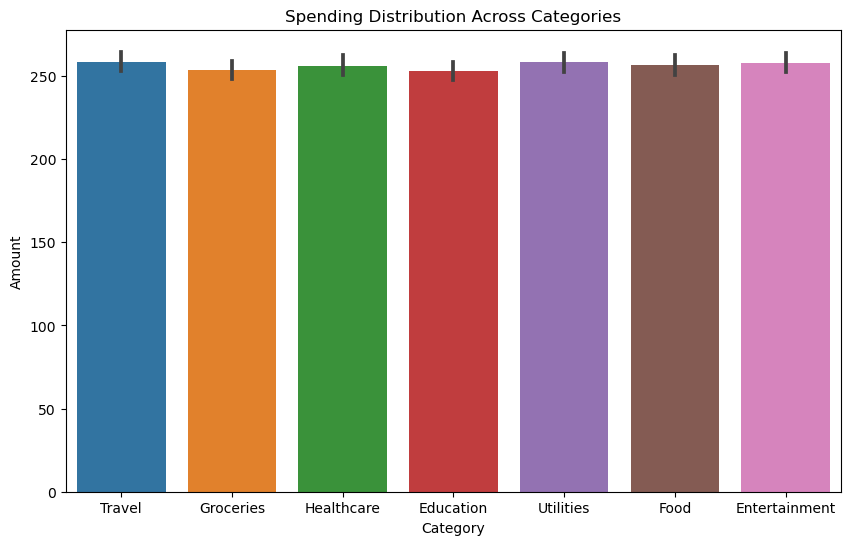

In [13]:
# Spending distribution across categories
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Category', y='Amount', data=data) 
plt.title('Spending Distribution Across Categories') 
plt.show()


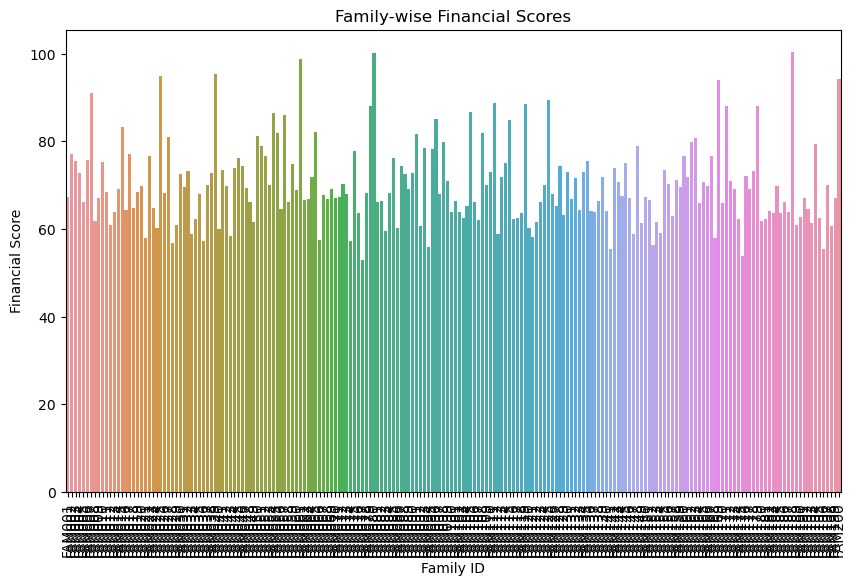

In [14]:
# Family-wise financial scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Family ID', y='Financial Score', data=data)
plt.title('Family-wise Financial Scores')
plt.xticks(rotation=90)
plt.show()



In [15]:
import plotly.express as px

# Create a line plot using Plotly
fig = px.line(data, x='Transaction Date', y='Amount', color='Member ID', title='Member-wise Spending Trends')

# Show the plot
fig.show()



In [16]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2024-11-27 14:35:40.298 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.409 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-27 14:35:41.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 14:35:41.866 Thread 'MainThread': mi

DeltaGenerator()

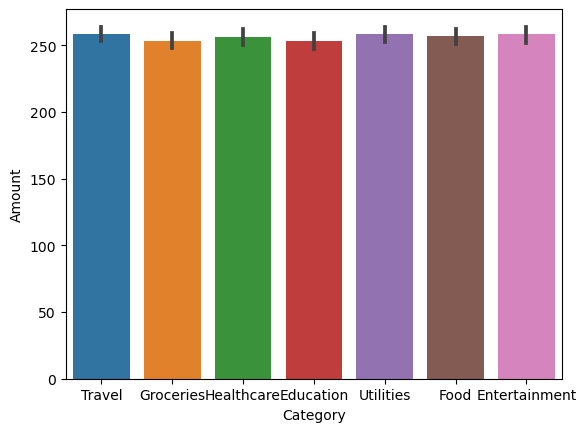

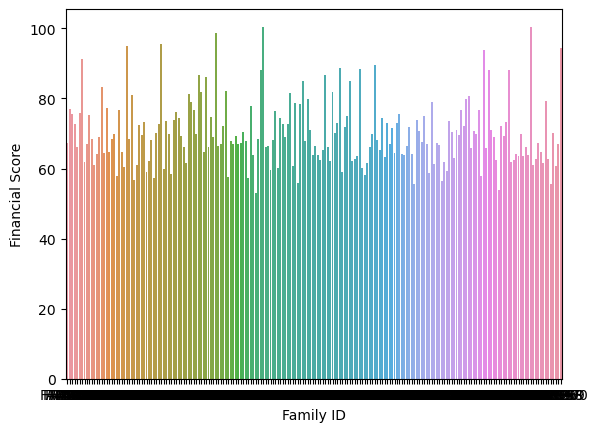

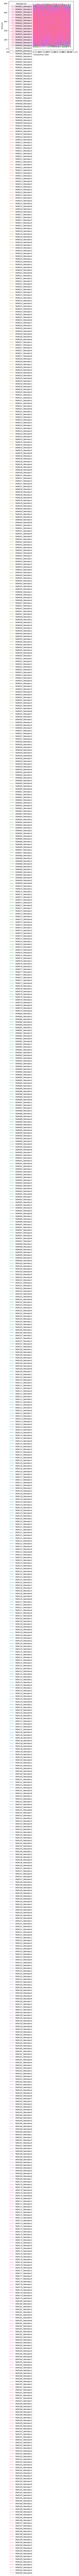

In [17]:
#. Implement a Simple Streamlit or Dash App
#Using Streamlit
import streamlit as st

# Streamlit app
st.title('Financial Insights Dashboard')

# Display data
st.write(data.head())

# Visualizations
st.subheader('Spending Distribution Across Categories')
fig, ax = plt.subplots()
sns.barplot(x='Category', y='Amount', data=data, ax=ax)
st.pyplot(fig)

st.subheader('Family-wise Financial Scores')
fig, ax = plt.subplots()
sns.barplot(x='Family ID', y='Financial Score', data=data, ax=ax)
st.pyplot(fig)

st.subheader('Member-wise Spending Trends')
fig, ax = plt.subplots()
sns.lineplot(x='Transaction Date', y='Amount', hue='Member ID', data=data, ax=ax)
st.pyplot(fig)


In [18]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
#Using Dash
import dash
from dash import dcc, html
# Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Financial Insights Dashboard'),

    dcc.Graph(
        id='spending-distribution',
        figure=px.bar(data, x='Category', y='Amount', title='Spending Distribution Across Categories')
    ),

    dcc.Graph(
        id='financial-scores',
        figure=px.bar(data, x='Family ID', y='Financial Score', title='Family-wise Financial Scores')
    ),

    dcc.Graph(
        id='spending-trends',
        figure=px.line(data, x='Transaction Date', y='Amount', color='Member ID', title='Member-wise Spending Trends')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [20]:
#Provide Recommendations for Improving Financial Scores
def provide_recommendations(row):
    recommendations = []
    if row['Savings'] / row['Income'] < 0.2:
        recommendations.append("Increase your savings to at least 20% of your income.")
    if row['Monthly Expenses'] / row['Income'] > 0.5:
        recommendations.append("Reduce your monthly expenses to below 50% of your income.")
    if row['Loan Payments'] / row['Income'] > 0.3:
        recommendations.append("Reduce your loan payments to below 30% of your income.")
    if row['Credit Card Spending'] / row['Income'] > 0.2:
        recommendations.append("Reduce your credit card spending to below 20% of your income.")
    if row['Financial Goals Met (%)'] < 80:
        recommendations.append("Aim to meet at least 80% of your financial goals.")
    return recommendations

data['Recommendations'] = data.apply(provide_recommendations, axis=1)


In [21]:
data

Family ID       Member ID Transaction Date       Category  Amount  \
0        FAM001  FAM001_Member1       2024-10-07         Travel  409.12   
1        FAM001  FAM001_Member1       2024-10-16         Travel  270.91   
2        FAM001  FAM001_Member1       2024-10-17      Groceries   91.10   
3        FAM001  FAM001_Member1       2024-10-25     Healthcare  198.23   
4        FAM001  FAM001_Member1       2024-10-25      Education  206.42   
...         ...             ...              ...            ...     ...   
16301    FAM200  FAM200_Member6       2024-10-10      Groceries   79.99   
16302    FAM200  FAM200_Member6       2024-10-22      Education  228.39   
16303    FAM200  FAM200_Member6       2024-10-29         Travel  258.63   
16304    FAM200  FAM200_Member6       2024-10-26         Travel  467.46   
16305    FAM200  FAM200_Member6       2024-10-27  Entertainment  475.34   

       Income  Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
0      113810    20234              5781           2422                  2959   
1      113810    20234              5781           2422                  2959   
2      113810    20234              5781           2422                  2959   
3      113810    20234              5781           2422                  2959   
4      113810    20234              5781           2422                  2959   
...       ...      ...               ...            ...                   ...   
16301   44621    44081              4296           2470                  2831   
16302   44621    44081              4296           2470                  2831   
16303   44621    44081              4296           2470                  2831   
16304   44621    44081              4296           2470                  2831   
16305   44621    44081              4296           2470                  2831   

       Dependents  Financial Goals Met (%)  Financial Score  \
0               2                       68        67.232106   
1               2                       68        67.232106   
2               2                       68        67.232106   
3               2                       68        67.232106   
4               2                       68        67.232106   
...           ...                      ...              ...   
16301           4                       92        94.369835   
16302           4                       92        94.369835   
16303           4                       92        94.369835   
16304           4                       92        94.369835   
16305           4                       92        94.369835   

                                         Recommendations  
0      [Increase your savings to at least 20% of your...  
1      [Increase your savings to at least 20% of your...  
2      [Increase your savings to at least 20% of your...  
3      [Increase your savings to at least 20% of your...  
4      [Increase your savings to at least 20% of your...  
...                                                  ...  
16301                                                 []  
16302                                                 []  
16303                                                 []  
16304                                                 []  
16305                                                 []  

[16306 rows x 14 columns]

In [22]:
pip install flask


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

@app.route('/score', methods=['POST'])
def score():
    data = request.get_json()
    df = pd.DataFrame(data)
    df['Financial Score'] = df.apply(calculate_financial_score, axis=1)
    return jsonify(df[['Family ID', 'Financial Score']].to_dict(orient='records'))

if __name__ == '__main__':
    app.run(debug=True)
    



 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1